In [50]:
# Xin quyen Google drive
from google.colab import drive
drive.mount('/content/ggdrive')

Drive already mounted at /content/ggdrive; to attempt to forcibly remount, call drive.mount("/content/ggdrive", force_remount=True).


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/ggdrive/MyDrive/Phân tích hiệu suất kinh doanh TIMA/test1.csv")

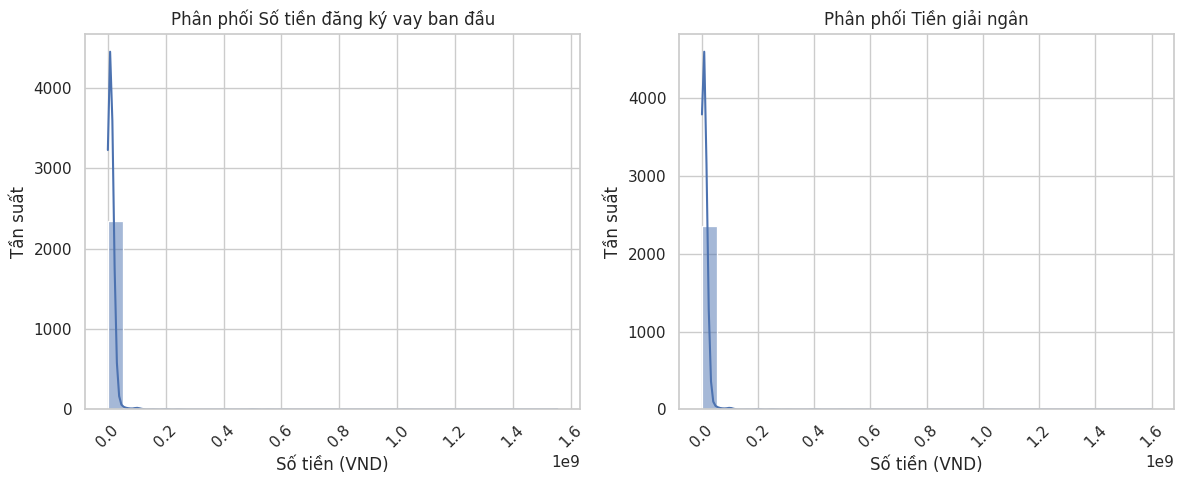

In [52]:
#3. Trực quan hóa các biến số riêng biệt
#3.1 Histogram cho các biến liên tục như SoTienDKVayBanDau, TienGiaiNgan để xem phân phối và độ lệch của chúng.
df = df[df['Số tiền đăng ký vay ban đầu'].notna() & (df['Số tiền đăng ký vay ban đầu'] > 0)]
df = df[df['Tiền giải ngân'].notna() & (df['Tiền giải ngân'] > 0)]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histogram cho Số tiền đăng ký vay ban đầu
sns.histplot(df['Số tiền đăng ký vay ban đầu'], bins=30, kde=True, ax=ax1)
ax1.set_title('Phân phối Số tiền đăng ký vay ban đầu')
ax1.set_xlabel('Số tiền (VND)')
ax1.set_ylabel('Tần suất')
ax1.tick_params(axis='x', rotation=45)

# Histogram cho Tiền giải ngân
sns.histplot(df['Tiền giải ngân'], bins=30, kde=True, ax=ax2)
ax2.set_title('Phân phối Tiền giải ngân')
ax2.set_xlabel('Số tiền (VND)')
ax2.set_ylabel('Tần suất')
ax2.tick_params(axis='x', rotation=45)

# Điều chỉnh layout để tránh chồng lấn
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

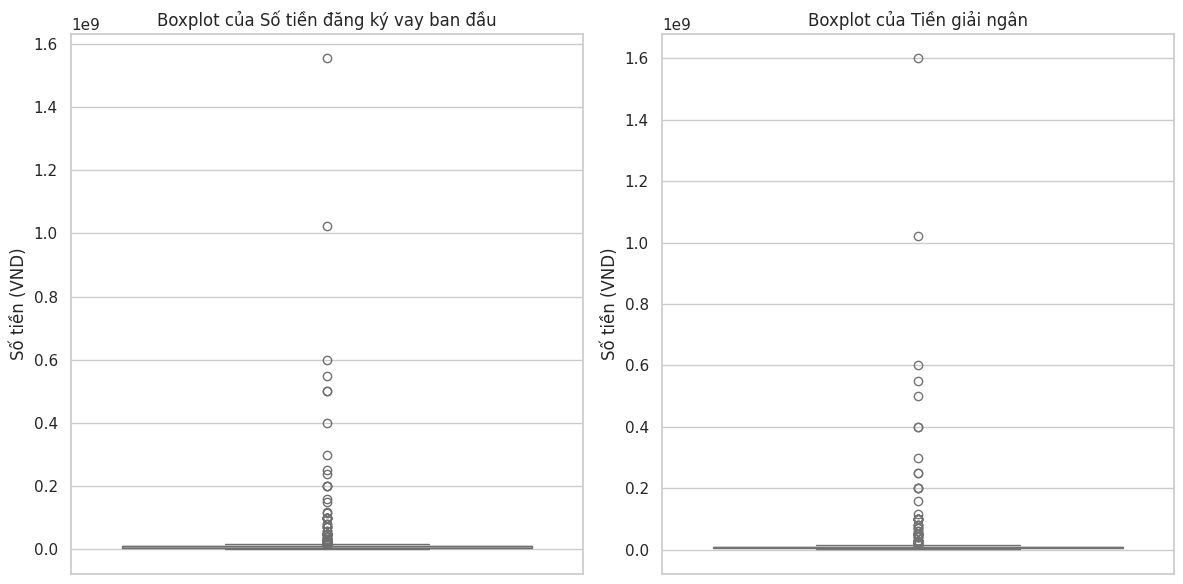

In [53]:
#3.2.Boxplot cho các biến số liên tục để kiểm tra các ngoại lai và sự phân phối của chúng (ví dụ: TienGiaiNgan).
plt.figure(figsize=(12, 6))

# Boxplot cho Số tiền đăng ký vay ban đầu
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Số tiền đăng ký vay ban đầu'], color='skyblue')
plt.title('Boxplot của Số tiền đăng ký vay ban đầu')
plt.ylabel('Số tiền (VND)')

# Boxplot cho Tiền giải ngân
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Tiền giải ngân'], color='lightgreen')
plt.title('Boxplot của Tiền giải ngân')
plt.ylabel('Số tiền (VND)')

# Điều chỉnh layout
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

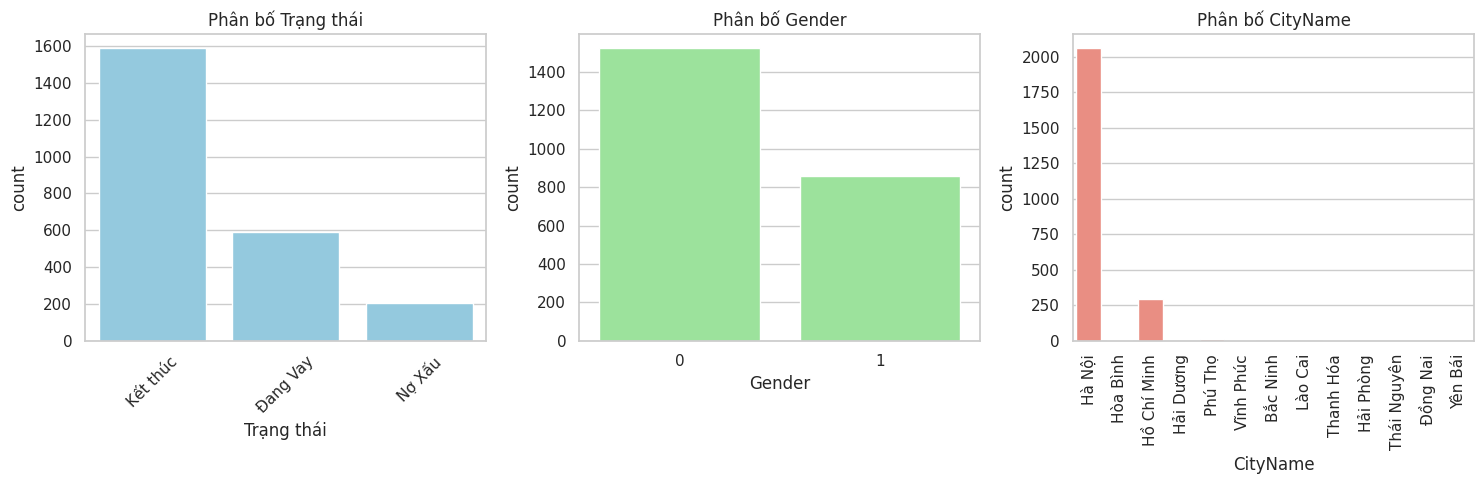

In [54]:
#3.3.Count plot cho các biến phân loại như Trạng thái, Gender, CityName để xem sự phân bố của các nhóm phân loại.
# Lọc dữ liệu để loại bỏ giá trị NaN trong các cột phân loại
df = df.dropna(subset=['Trạng thái', 'Gender', 'CityName'])

# Tạo figure với 3 subplots
plt.figure(figsize=(15, 5))

# Count plot cho Trạng thái
plt.subplot(1, 3, 1)
sns.countplot(x='Trạng thái', data=df, color='skyblue')
plt.title('Phân bố Trạng thái')
plt.xticks(rotation=45)

# Count plot cho Gender
plt.subplot(1, 3, 2)
sns.countplot(x='Gender', data=df, color='lightgreen')
plt.title('Phân bố Gender')

# Count plot cho CityName
plt.subplot(1, 3, 3)
sns.countplot(x='CityName', data=df, color='salmon')
plt.title('Phân bố CityName')
plt.xticks(rotation=90)

plt.tight_layout()
# Hiển thị biểu đồ
plt.show()

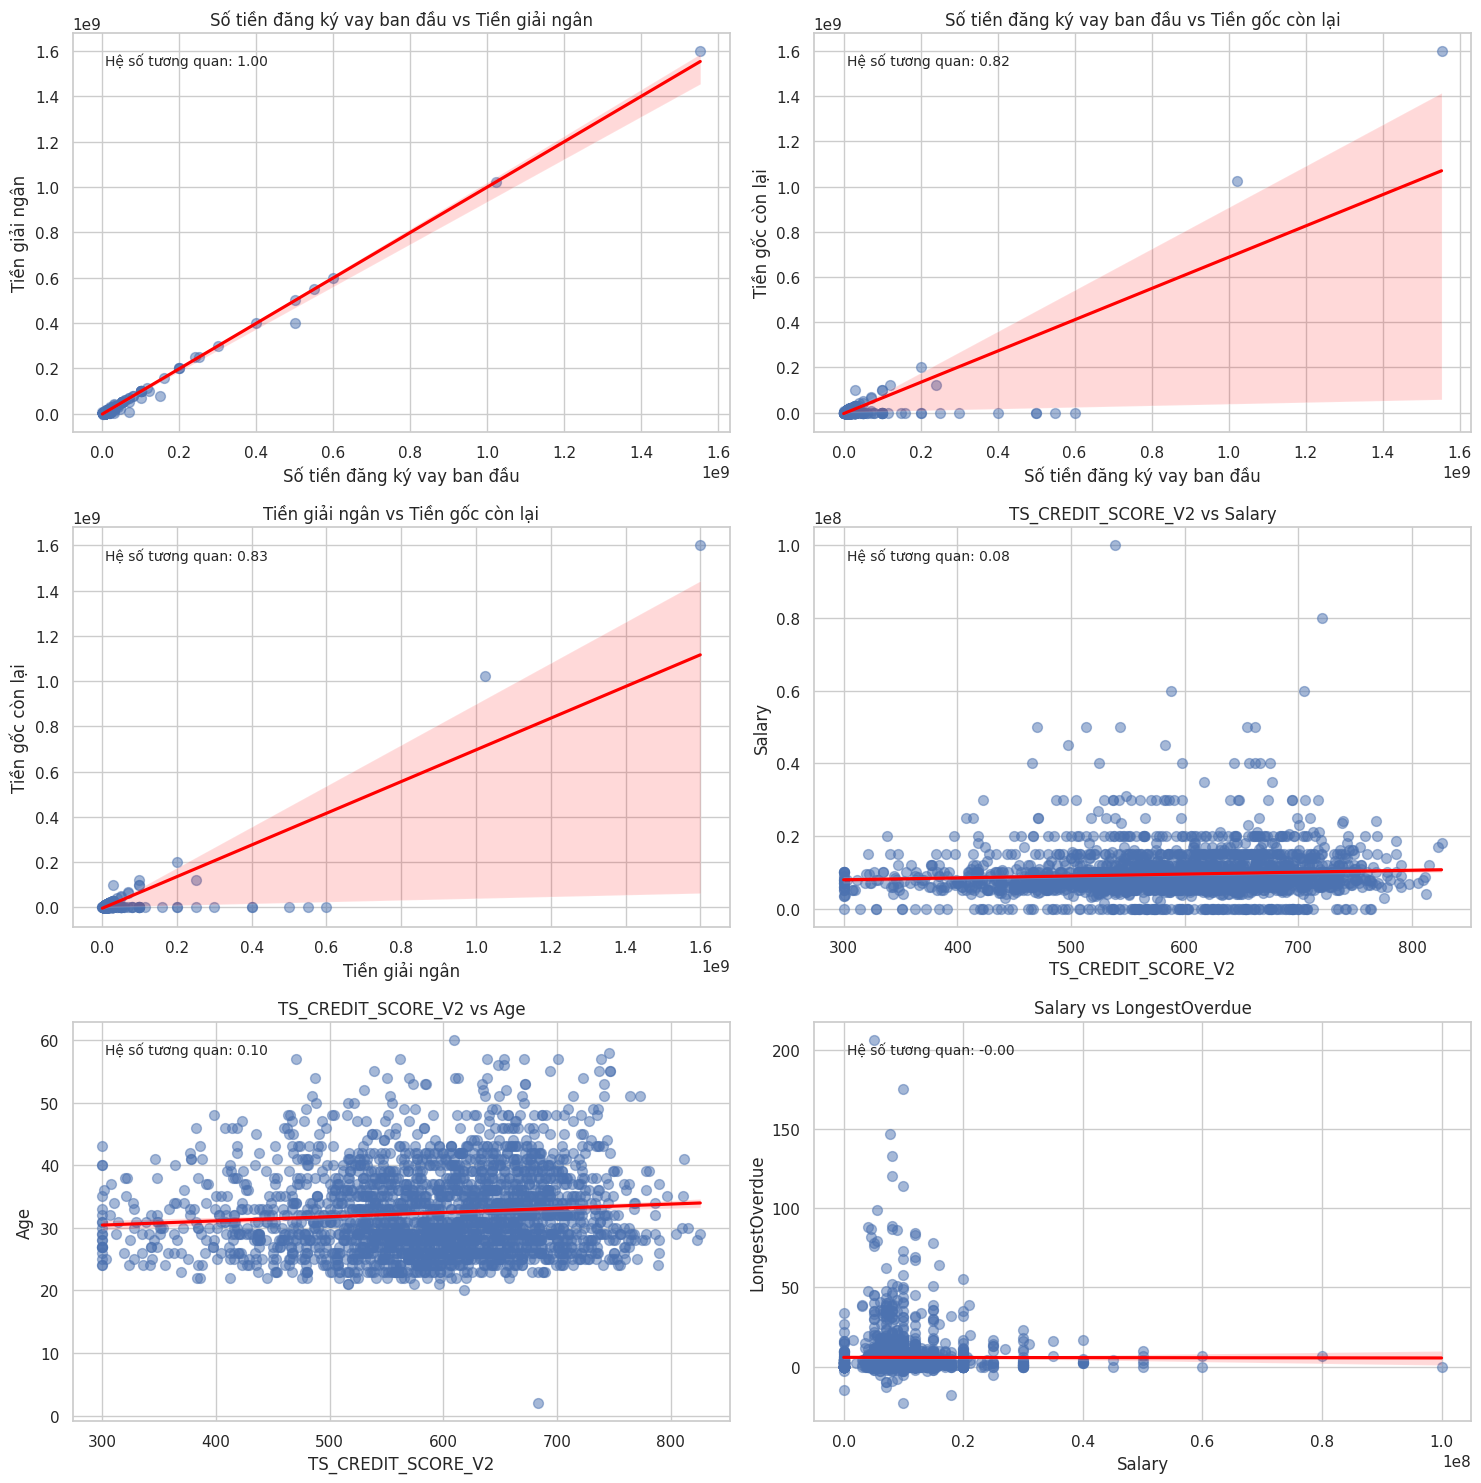

In [55]:
#4. Khám phá mối quan hệ giữa các biến
#4.1.Scatter plot: Để kiểm tra mối quan hệ giữa hai biến số liên tục, ví dụ: SoTienDKVayBanDau với TienGiaiNgan.
import numpy as np
# Thiết lập kiểu biểu đồ
sns.set(style="whitegrid")

# Hàm làm sạch dữ liệu
def clean_data(data):
    # Chọn các biến liên tục
    continuous_vars = [
        'Số tiền đăng ký vay ban đầu',
        'Tiền giải ngân',
        'Tiền gốc còn lại',
        'TS_CREDIT_SCORE_V2',
        'Salary',
        'LongestOverdue',
        'Age'
    ]

    # Chuyển đổi các cột sang kiểu số, xử lý giá trị không hợp lệ
    for col in continuous_vars:
        data[col] = pd.to_numeric(data[col], errors='coerce')

    # Loại bỏ các hàng có giá trị NaN trong các cột được chọn
    data = data.dropna(subset=continuous_vars)

    return data, continuous_vars

# Định nghĩa các cặp biến để vẽ biểu đồ
variable_pairs = [
    ('Số tiền đăng ký vay ban đầu', 'Tiền giải ngân'),
    ('Số tiền đăng ký vay ban đầu', 'Tiền gốc còn lại'),
    ('Tiền giải ngân', 'Tiền gốc còn lại'),
    ('TS_CREDIT_SCORE_V2', 'Salary'),
    ('TS_CREDIT_SCORE_V2', 'Age'),
    ('Salary', 'LongestOverdue')
]

# Hàm tạo các biểu đồ phân tán
def create_scatter_plots(data, variable_pairs):
    # Thiết lập lưới biểu đồ
    n_plots = len(variable_pairs)
    n_cols = 2
    n_rows = (n_plots + 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()

    # Vẽ từng cặp biến
    for idx, (x_var, y_var) in enumerate(variable_pairs):
        # Tạo biểu đồ phân tán với đường hồi quy
        sns.regplot(x=x_var, y=y_var, data=data, ax=axes[idx], scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red'})
        axes[idx].set_title(f'{x_var} vs {y_var}')
        axes[idx].set_xlabel(x_var)
        axes[idx].set_ylabel(y_var)

        # Tính và hiển thị hệ số tương quan
        correlation = data[[x_var, y_var]].corr().iloc[0, 1]
        axes[idx].text(0.05, 0.95, f'Hệ số tương quan: {correlation:.2f}', transform=axes[idx].transAxes, fontsize=10, verticalalignment='top')

    # Xóa các ô trống
    for idx in range(len(variable_pairs), len(axes)):
        fig.delaxes(axes[idx])

    # Điều chỉnh bố cục
    plt.tight_layout()
    plt.show()

# Làm sạch dữ liệu
cleaned_data, continuous_vars = clean_data(df)

# Tạo các biểu đồ phân tán
create_scatter_plots(cleaned_data, variable_pairs)

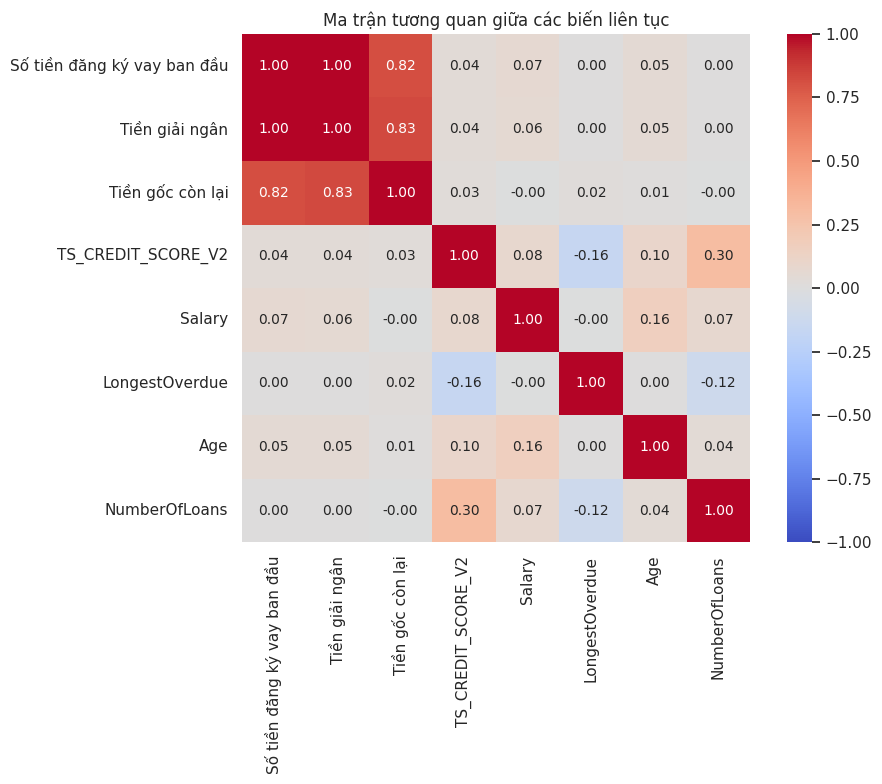

In [56]:
#4.2.- Heatmap:Dùng để kiểm tra mối quan hệ tương quan giữa các biến số liên tục (ví dụ: mối tương quan giữa Salary, NumberOfLoans, và SoTienConLai)

sns.set(style="whitegrid")

# Hàm làm sạch dữ liệu
def clean_data(data):
    # Chọn các biến liên tục
    continuous_vars = [
        'Số tiền đăng ký vay ban đầu',
        'Tiền giải ngân',
        'Tiền gốc còn lại',
        'TS_CREDIT_SCORE_V2',
        'Salary',
        'LongestOverdue',
        'Age',
        'NumberOfLoans'
    ]

    # Chuyển đổi các cột sang kiểu số, xử lý giá trị không hợp lệ
    for col in continuous_vars:
        if col in data.columns:  # Kiểm tra xem cột có tồn tại
            data[col] = pd.to_numeric(data[col], errors='coerce')
        else:
            print(f"Cột {col} không tồn tại trong dữ liệu.")

    # Loại bỏ các hàng có giá trị NaN trong các cột được chọn
    existing_vars = [col for col in continuous_vars if col in data.columns]
    data = data.dropna(subset=existing_vars)

    return data, existing_vars

# Hàm tạo heatmap
def create_heatmap(data, continuous_vars):
    # Tính ma trận tương quan
    corr_matrix = data[continuous_vars].corr(method='pearson')

    # Tạo heatmap
    plt.figure(figsize=(10, 8))  # Kích thước biểu đồ
    sns.heatmap(
        corr_matrix,
        annot=True,  # Hiển thị giá trị tương quan trên ô
        cmap='coolwarm',  # Màu sắc từ đỏ (tương quan dương) đến xanh (tương quan âm)
        vmin=-1, vmax=1,  # Phạm vi giá trị tương quan
        center=0,  # Đặt 0 là trung tâm màu sắc
        fmt='.2f',  # Định dạng số thập phân
        square=True,  # Làm các ô vuông
        annot_kws={'size': 10}  # Kích thước chữ trên ô
    )

    plt.title('Ma trận tương quan giữa các biến liên tục')
    plt.tight_layout()
    plt.show()


# Làm sạch dữ liệu
cleaned_data, continuous_vars = clean_data(df)

# Tạo heatmap
create_heatmap(cleaned_data, continuous_vars)


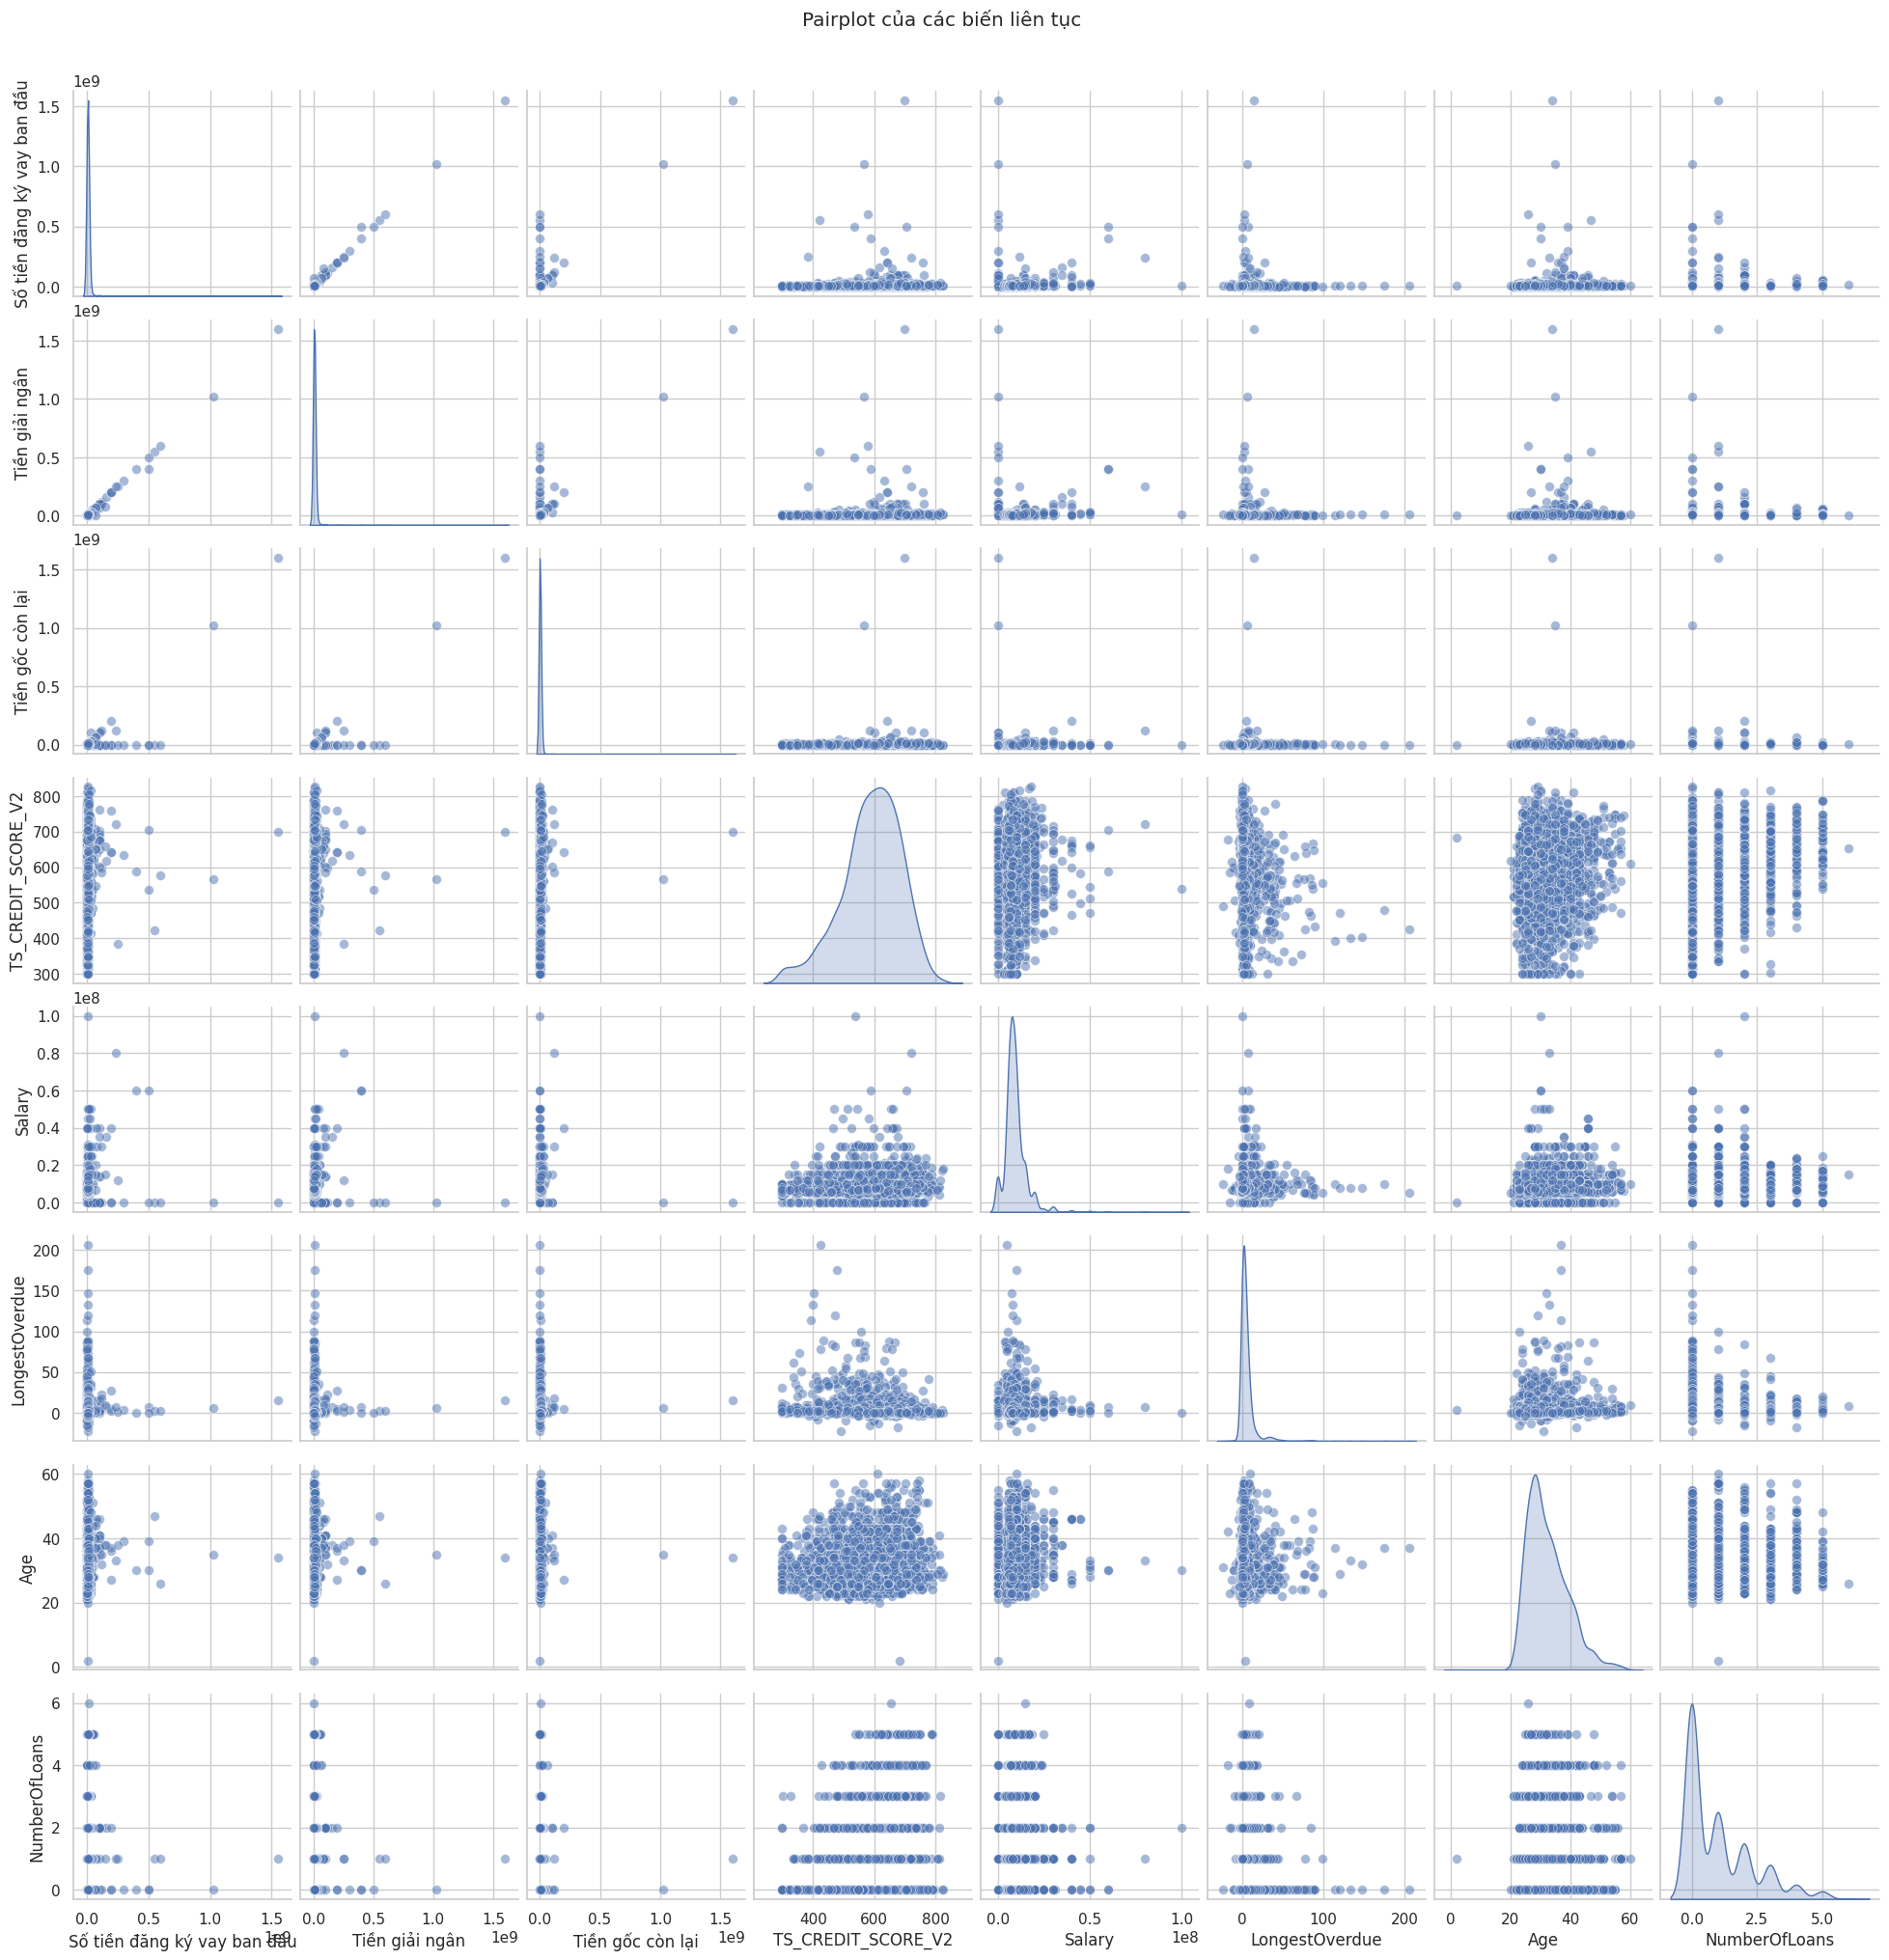

In [57]:
#4.3.- Pairplot:- Nếu bạn muốn kiểm tra mối quan hệ giữa nhiều biến số liên tục, Pairplot sẽ giúp bạn so sánh tất cả các cặp biến liên tục trong dữ liệu (ví dụ: SoTienDKVayBanDau, TienGiaiNgan, Salary).
sns.set(style="whitegrid")

def clean_data(data):
    # Chọn các biến liên tục
    continuous_vars = [
        'Số tiền đăng ký vay ban đầu',
        'Tiền giải ngân',
        'Tiền gốc còn lại',
        'TS_CREDIT_SCORE_V2',
        'Salary',
        'LongestOverdue',
        'Age',
        'NumberOfLoans'
    ]

    # Kiểm tra và chuyển đổi các cột sang kiểu số
    for col in continuous_vars:
        if col in data.columns:
            data[col] = pd.to_numeric(data[col], errors='coerce')
        else:
            print(f"Cột {col} không tồn tại trong dữ liệu.")

    # Loại bỏ các hàng có giá trị NaN trong các cột được chọn
    existing_vars = [col for col in continuous_vars if col in data.columns]
    data = data.dropna(subset=existing_vars)

    return data, existing_vars

# Hàm tạo pairplot
def create_pairplot(data, continuous_vars):
    # Tạo pairplot
    sns.pairplot(
        data[continuous_vars],
        diag_kind='kde',  # Sử dụng KDE cho đường chéo
        plot_kws={'alpha': 0.5, 's': 50},  # Tùy chỉnh điểm phân tán
        diag_kws={'fill': True}  # Tùy chỉnh KDE
    )

    plt.suptitle('Pairplot của các biến liên tục', y=1.02)  # Tiêu đề
    plt.show()


# Làm sạch dữ liệu
cleaned_data, continuous_vars = clean_data(df)
# Tạo pairplot
create_pairplot(cleaned_data, continuous_vars)


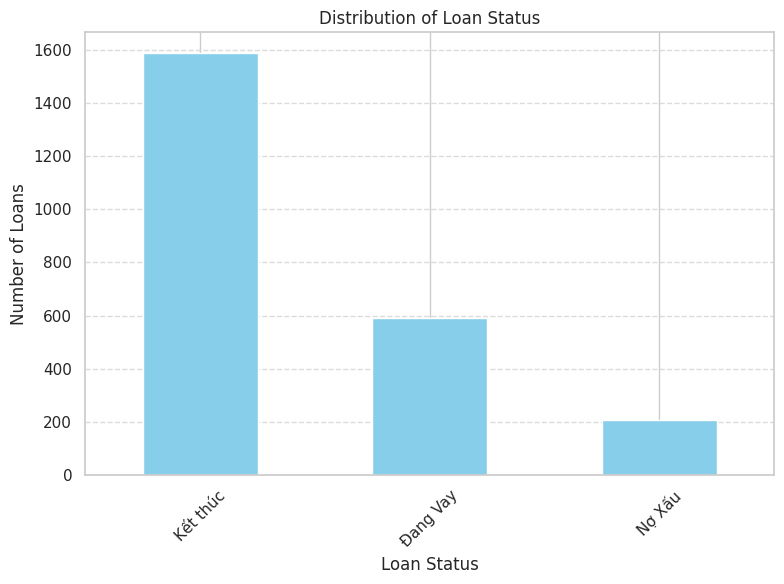

In [58]:
#5.Trực quan hóa các nhóm phân loại
#Bar plot:
#Dùng để trực quan hóa sự phân bổ của các nhóm phân loại, ví dụ: phân tích số lượng khách hàng vay theo các Trạng thái (đã trả nợ, chưa trả nợ).

status_counts = df['Trạng thái'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
status_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Tổng số khách hàng duy nhất: 1868


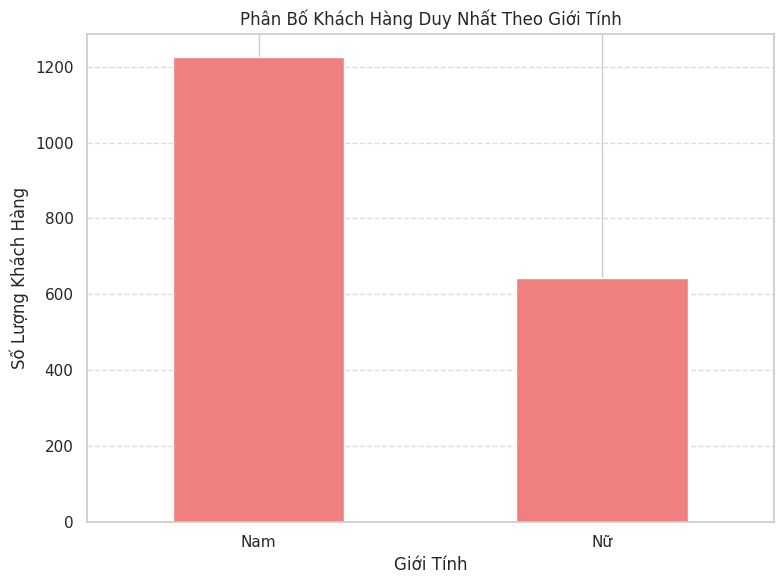

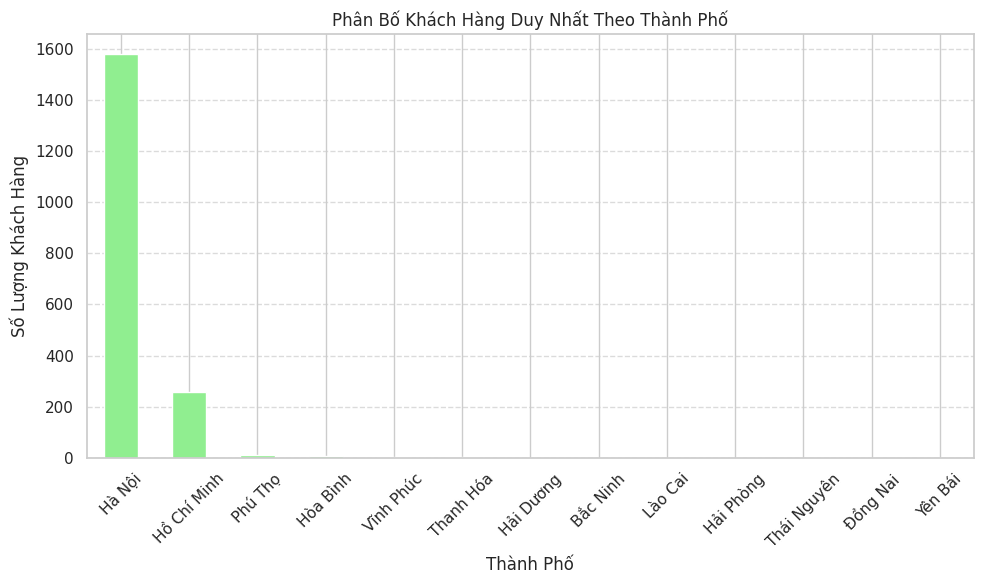

In [59]:
#Phân tích Gender hoặc CityName để thấy sự phân bố giữa các nhóm.
# 1. Tính tổng số khách hàng duy nhất dựa trên CardNumber
total_customers = df['CardNumber'].nunique()
print(f"Tổng số khách hàng duy nhất: {total_customers}")

# 2. Tạo DataFrame chỉ chứa các khách hàng duy nhất (dựa trên CardNumber)
unique_customers = df.drop_duplicates(subset=['CardNumber'])

# Phân tích phân bố theo Gender
gender_counts = unique_customers['Gender'].value_counts()
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color='lightcoral')
plt.title('Phân Bố Khách Hàng Duy Nhất Theo Giới Tính')
plt.xlabel('Giới Tính')
plt.ylabel('Số Lượng Khách Hàng')
plt.xticks(ticks=[0, 1], labels=['Nam', 'Nữ'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Phân tích phân bố theo CityName
city_counts = unique_customers['CityName'].value_counts()
plt.figure(figsize=(10, 6))
city_counts.plot(kind='bar', color='lightgreen')
plt.title('Phân Bố Khách Hàng Duy Nhất Theo Thành Phố')
plt.xlabel('Thành Phố')
plt.ylabel('Số Lượng Khách Hàng')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-60-113897055.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='Salary', data=unique_customers, palette=['lightcoral', 'lightblue'])


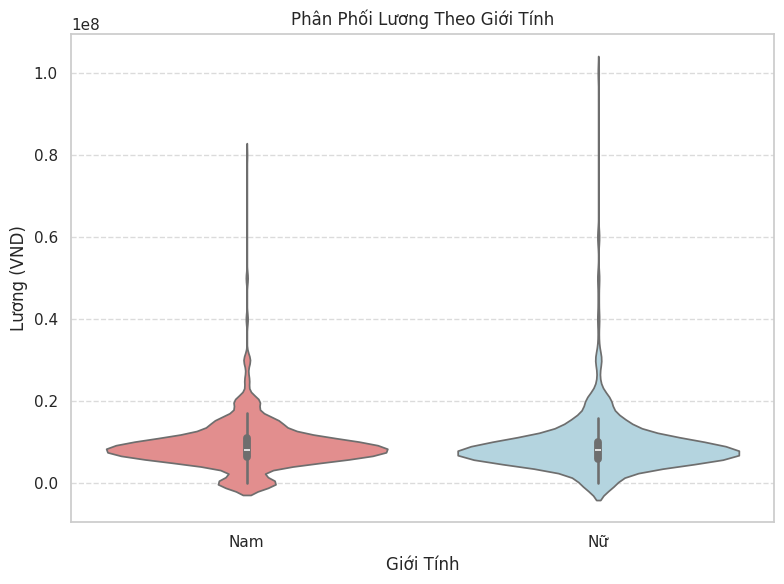

In [60]:
#- Violin plot: - Dùng để so sánh sự phân phối của các biến số liên tục giữa các nhóm phân loại (ví dụ: so sánh Salary theo các nhóm Gender).
plt.figure(figsize=(8, 6))
sns.violinplot(x='Gender', y='Salary', data=unique_customers, palette=['lightcoral', 'lightblue'])
plt.title('Phân Phối Lương Theo Giới Tính')
plt.xlabel('Giới Tính')
plt.ylabel('Lương (VND)')
plt.xticks(ticks=[0, 1], labels=['Nam', 'Nữ'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

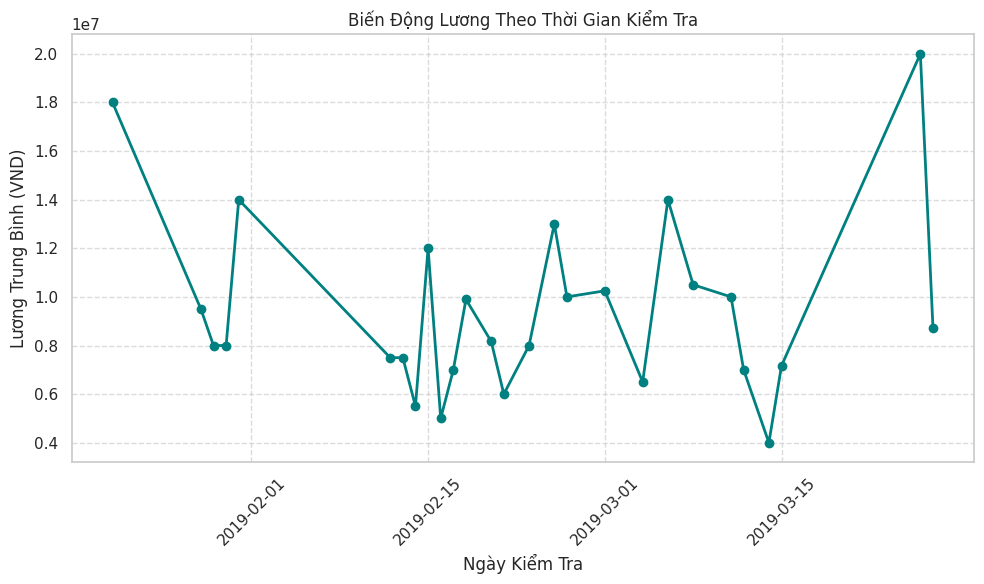

In [63]:
#6. Trực quan hóa dữ liệu theo thời gian

# Chuyển cột CheckTime thành định dạng datetime với định dạng đúng
df['CheckTime'] = pd.to_datetime(unique_customers['CheckTime'], format='%b %d, %Y %I:%M:%S %p', errors='coerce')

# Sắp xếp theo thời gian
df = df.sort_values('CheckTime')

# Tính trung bình Salary theo thời gian (hoặc một biến số khác nếu muốn)
salary_over_time = df.groupby(unique_customers['CheckTime'].dt.date)['Salary'].mean()

# Vẽ line plot
plt.figure(figsize=(10, 6))
plt.plot(salary_over_time.index, salary_over_time.values, marker='o', color='teal', linestyle='-', linewidth=2)
plt.title('Biến Động Lương Theo Thời Gian Kiểm Tra')
plt.xlabel('Ngày Kiểm Tra')
plt.ylabel('Lương Trung Bình (VND)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

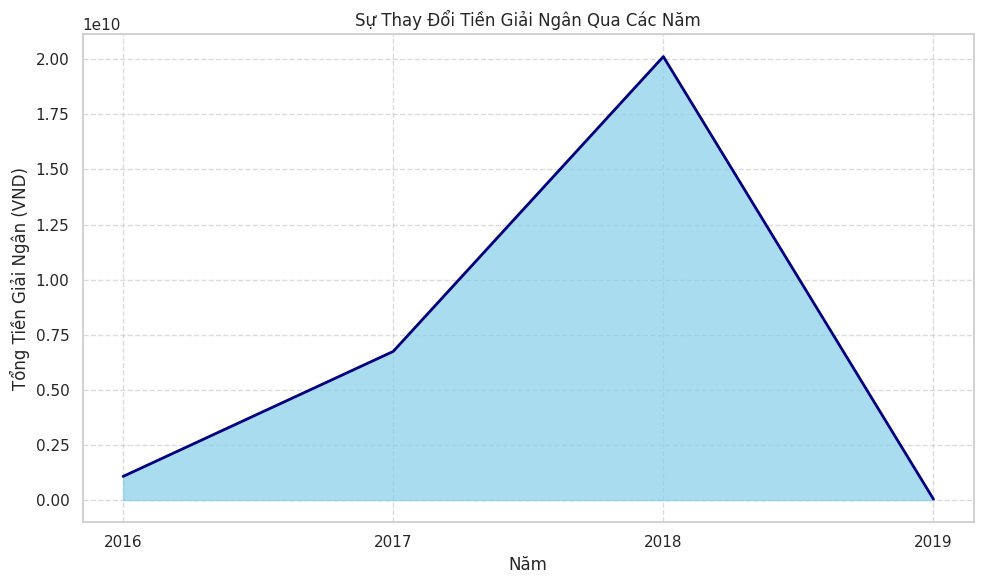

In [64]:
# Chuyển cột application_date thành định dạng datetime
df['application_date'] = pd.to_datetime(df['application_date'], errors='coerce')

# Trích xuất năm từ application_date
df['Year'] = df['application_date'].dt.year

# Tính tổng TienGiaiNgan theo từng năm
tien_giai_ngan_by_year = df.groupby('Year')['Tiền giải ngân'].sum()

# Vẽ area plot
plt.figure(figsize=(10, 6))
plt.fill_between(tien_giai_ngan_by_year.index, tien_giai_ngan_by_year.values, color='skyblue', alpha=0.7)
plt.plot(tien_giai_ngan_by_year.index, tien_giai_ngan_by_year.values, color='navy', linewidth=2)

plt.title('Sự Thay Đổi Tiền Giải Ngân Qua Các Năm')
plt.xlabel('Năm')
plt.ylabel('Tổng Tiền Giải Ngân (VND)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(tien_giai_ngan_by_year.index)
plt.tight_layout()
plt.show()